# PS4 Game Sales - Data Analysis

### Dataset Source : https://www.kaggle.com/gregorut/videogamesales

#### Import dataset for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

In [2]:
ps4 = pd.read_csv('ps_gamesales.csv', encoding = "ISO-8859-1")

In [3]:
ps4.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


### Who are the top15 ps4 publishers (Global Market)?

In [4]:
# new dataframe for sales by publisher
publisher_sales = ps4.groupby('Publisher').agg({'North America' : 'sum',
                             'Europe': 'sum',
                             'Japan': 'sum',
                             'Rest of World': 'sum',
                             'Global': 'sum'})

In [5]:
publisher_sales.head()

,North America,Europe,Japan,Rest of World,Global
Publisher,,,,,
2K Games,2.93,3.62,0.18,1.28,8.03
2K Sports,10.22,3.96,0.14,3.05,17.36
3D Realms,0.00,0.00,0.00,0.00,0.00
505 Games,1.26,2.21,0.07,0.66,4.19
5pb,0.03,0.00,0.08,0.01,0.12


In [6]:
# Top 15 ps4 publishers by global sales
publisher_sales.sort_values(by = 'Global', ascending = False).head(20)

,North America,Europe,Japan,Rest of World,Global
Publisher,,,,,
Activision,28.20,30.96,1.65,11.71,72.44
Ubisoft,18.50,29.46,1.91,9.22,59.16
Electronic Arts,17.05,27.88,1.42,8.60,54.96
Sony Interactive Entertainment,21.07,22.96,2.14,8.73,54.85
EA Sports,15.18,24.36,0.40,7.60,47.55
Sony Computer Entertainment,15.95,17.96,1.64,6.72,42.26
Rockstar Games,11.50,16.24,0.81,5.38,33.93
Square Enix,9.60,10.36,5.95,3.97,29.92
Bethesda Softworks,9.82,13.83,0.71,4.56,28.96


### Assuming that our local region falls in the 'Rest of World' market, get the top 15 publishers:

In [7]:
# Top 15 ps4 publishers by our region's sales
g = publisher_sales.sort_values(by = 'Rest of World', ascending = False).head(15)

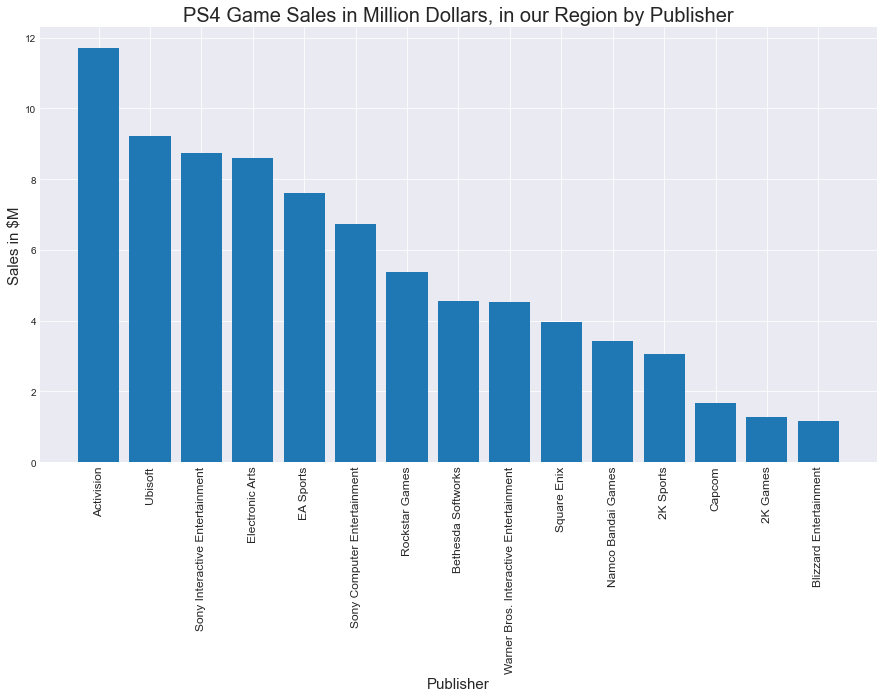

In [30]:
plt.figure(figsize = (15,8))
plt.bar(x = g.index, height = g['Rest of World'])
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel('Sales in $M', fontsize = 15)
plt.xlabel('Publisher', fontsize = 15)
plt.title('PS4 Game Sales in Million Dollars, in our Region by Publisher', fontsize = 20)
plt.show()

### Top selling genres in 'Rest of World'

In [9]:
genre_sales = ps4.groupby('Genre').agg({'North America' : 'sum',
                             'Europe': 'sum',
                             'Japan': 'sum',
                             'Rest of World': 'sum',
                             'Global': 'sum'})
genre_sales.head(20)

,North America,Europe,Japan,Rest of World,Global
Genre,,,,,
Action,48.15,57.53,10.27,20.76,136.85
Action-Adventure,22.30,27.79,1.96,9.83,61.86
Adventure,5.27,6.08,1.64,2.23,15.22
Fighting,8.58,6.19,1.67,2.98,19.46
MMO,1.32,1.45,0.20,0.55,3.52
Misc,3.64,6.03,0.96,1.85,12.47
Music,2.40,1.62,0.17,0.84,5.03
Party,0.09,0.47,0.00,0.10,0.65
Platform,5.48,8.92,0.67,2.77,17.85


In [10]:
g1 = genre_sales.sort_values(by = 'Rest of World', ascending=False)
g1.head()

,North America,Europe,Japan,Rest of World,Global
Genre,,,,,
Shooter,50.50,58.64,4.42,21.48,134.99
Action,48.15,57.53,10.27,20.76,136.85
Sports,33.31,42.81,1.83,14.90,92.85
Action-Adventure,22.30,27.79,1.96,9.83,61.86
Role-Playing,22.15,22.40,9.42,8.91,62.82


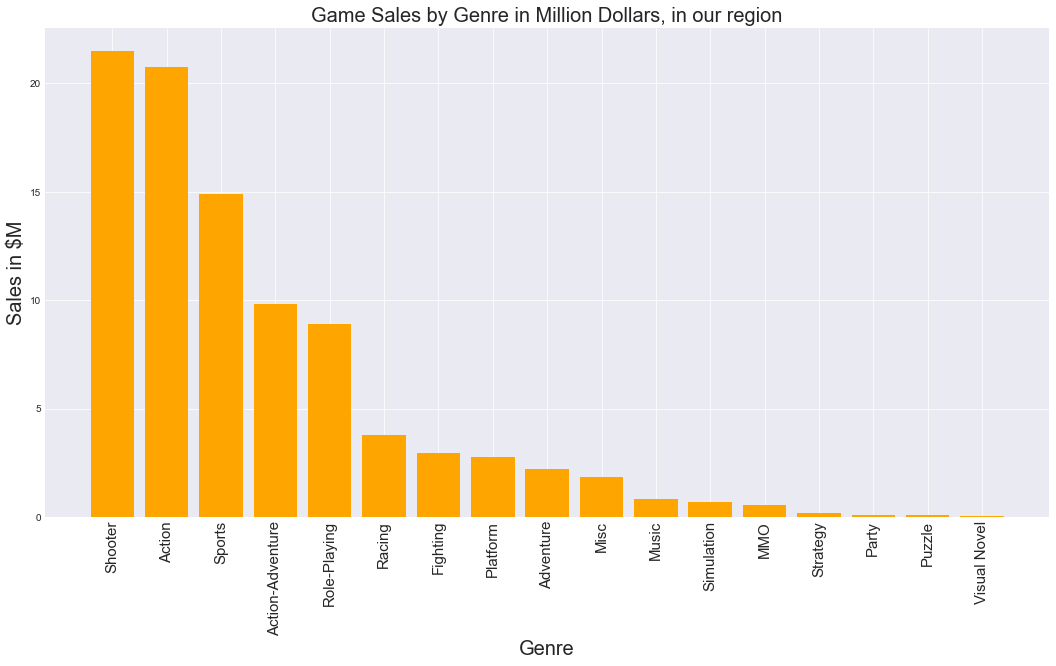

In [23]:
plt.figure(figsize=(18,9))
plt.bar(x = g1.index, height = g1['Rest of World'], color = 'orange')
plt.xticks(rotation = 90, fontsize = 15)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Sales in $M', fontsize = 20)
plt.title('Game Sales by Genre in Million Dollars, in our region', fontsize = 20)
plt.show()

### What are the top 20 games in 'Rest of World' based on game sales:

In [12]:
top20_games = ps4.sort_values(by = 'Rest of World', ascending = False).head(20)
top20_games.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


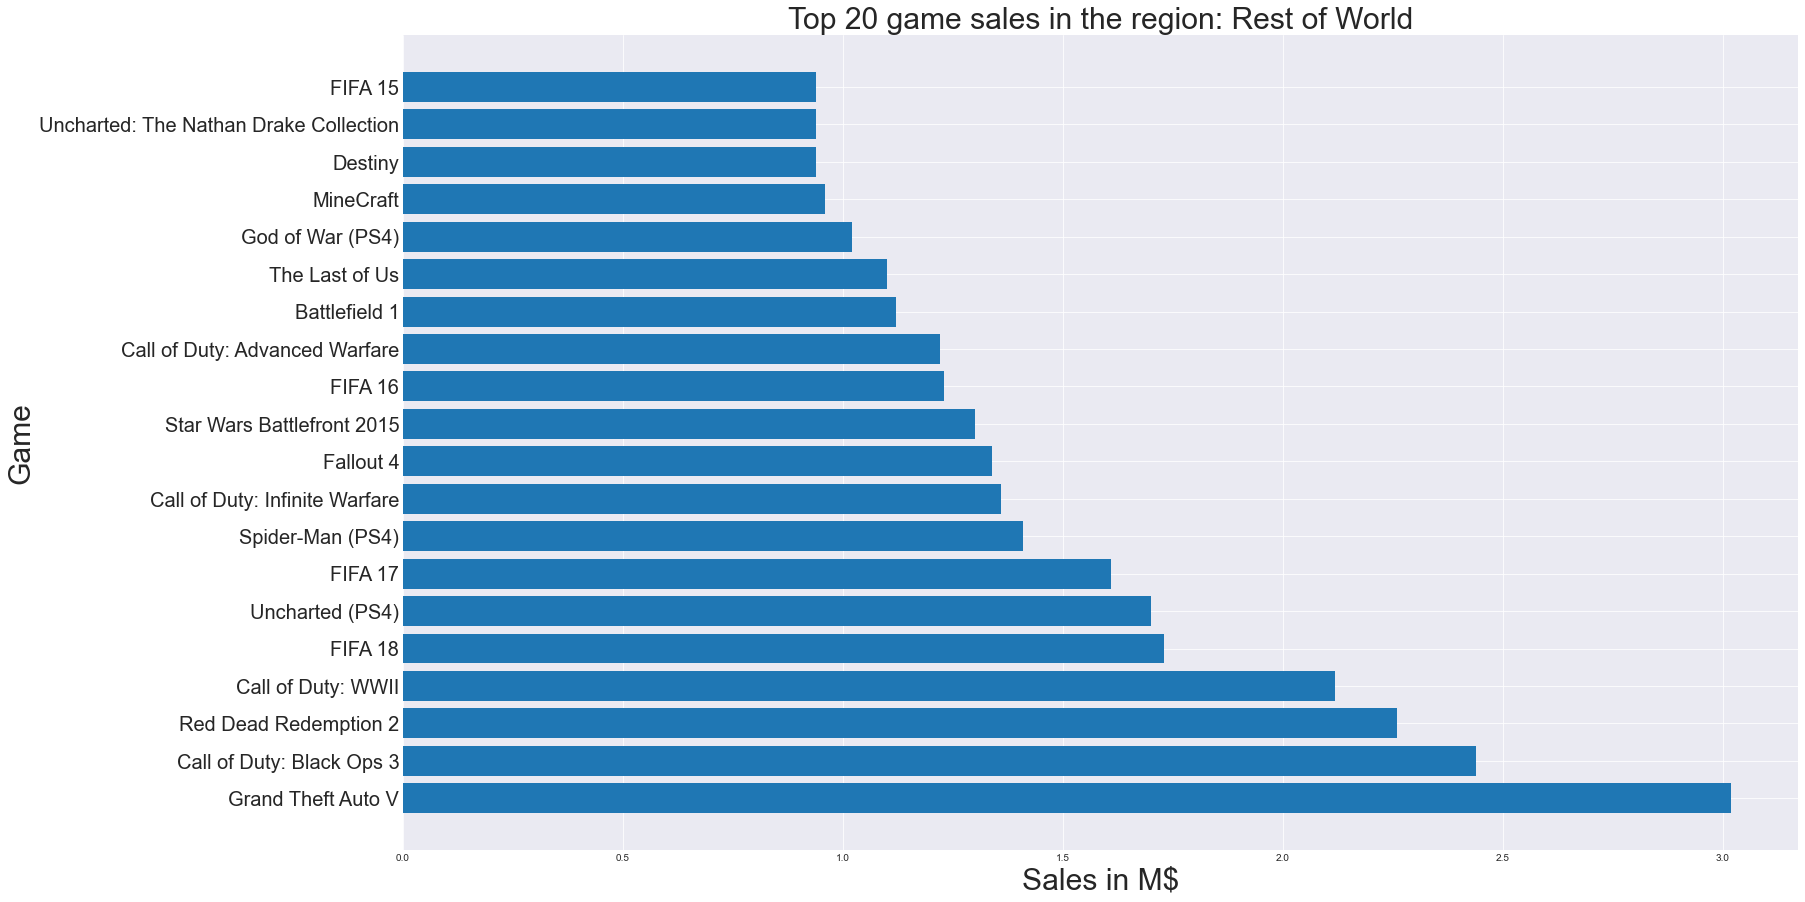

In [21]:
plt.figure(figsize = (25,15))
plt.barh(y = top20_games.Game, width = top20_games['Rest of World'])
plt.title('Top 20 game sales in the region: Rest of World', fontsize = 30)
plt.ylabel('Game', fontsize = 30)
plt.xlabel('Sales in M$', fontsize = 30)
plt.yticks(fontsize = 20)
plt.show()